# Introduction

MNIST ("Modified National Institute of Standards and Technology") is the de facto “Hello World” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

**Objective is to correctly identify digits from a dataset of tens of thousands of handwritten images**

**Importing the libraries**

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns

Now that we have successfully imported the required libraries, let us print out the version of Tensorflow which we will working upon. Also, checking the image format from tensorflow backend.

In [2]:
print("Version of Tensorflow:", tf.__version__)
print("Image data format: ", tf.keras.backend.image_data_format())

Version of Tensorflow: 1.13.1
Image data format:  channels_last


As we can see, we are using 1.13 tensorflow version. Also, the image data format config is set to channel_last, which means that the 2D shape would be (row, cols, channels)

**Loading the dataset**

In [3]:
mnist_data = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

print("INPUT : train shape: ", x_train.shape)
print("OUTPUT: train shape: ", y_train.shape)
print("INPUT : test shape: ", x_test.shape)
print("OUTPUT: test shape: ", y_test.shape)

INPUT : train shape:  (60000, 28, 28)
OUTPUT: train shape:  (60000,)
INPUT : test shape:  (10000, 28, 28)
OUTPUT: test shape:  (10000,)


As we can see, the shape of the train and test feature are 3D i.e for training set, there are 60k rows of 28 x 28 data.

However, as we are using keras with tensorflow backend, we will have to convert the above shape to be of the form (60k * 28 x 28 X 1) i.e 4D tensor

In [4]:
x_train_new = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test_new = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

print("After reshaping -> INPUT : train shape: ", x_train_new.shape)
print("After reshaping -> INPUT : test shape: ", x_train_new.shape)

After reshaping -> INPUT : train shape:  (60000, 28, 28, 1)
After reshaping -> INPUT : test shape:  (60000, 28, 28, 1)


**Visualizing the Output**

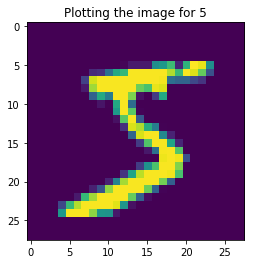

In [5]:
plt.close()
plt.title("Plotting the image for "+ str(y_train[0]))
plt.imshow(x_train[0])
plt.show()

**Preprocessing the data**

Now, we would be normalizing the data before creating our model.

Typically, we employ 2 methods to normalize our data for MNIST 


1.   Divide each element by 255
2.   Just use keras.utils.normalize

We would be using the built in function for normalizing



In [6]:
x_train_new = tf.keras.utils.normalize(x_train_new)
x_test_new = tf.keras.utils.normalize(x_test_new)

print("After Normalizing -> INPUT : train shape: ", x_train_new.shape)
print("After Normalizing -> INPUT : test shape: ", x_train_new.shape)

After Normalizing -> INPUT : train shape:  (60000, 28, 28, 1)
After Normalizing -> INPUT : test shape:  (60000, 28, 28, 1)


So we are done with normalizing. Now we would be one hot encoding the output variable so that we are able to feed it into the output layer for softmax classifier activation function.

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print("After Encoding -> OUTPUT : train shape: ", y_train.shape)
print("After Encoding -> OUTPUT : test shape: ", y_test.shape)

After Encoding -> OUTPUT : train shape:  (60000, 10)
After Encoding -> OUTPUT : test shape:  (10000, 10)


# CNN Model on MNIST dataset

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D

n_epochs = 25
batchsize = 128

final_output = pd.DataFrame(columns=["#ConvNets", "#Kernels/Filters", "Padding", "Stride", "Dropout", "BatchNormalization", "Regularization", "TRAIN_LOSS", "TEST_LOSS", "TRAIN_ACC", "TEST_ACC"]);

In [0]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

## 2 ConvNet Architecture

In this type of architecture, we will be trying out 2 convolution layer along with 2 maxpooling layer for each.

### 3x3 Filter/Kernel

In [10]:
m21_model = Sequential()

# First Convolutional layer with MaxPooling
m21_model.add(Conv2D(32, kernel_size=(3,3), activation=tf.nn.relu, input_shape=(28,28,1)))
m21_model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional layer with MaxPooling
m21_model.add(Conv2D(64, kernel_size=(3,3), activation=tf.nn.relu))
m21_model.add(MaxPooling2D(pool_size=(2,2)))

# Three dense layers in MLP
m21_model.add(Flatten())
m21_model.add(Dense(128, activation=tf.nn.relu))
m21_model.add(Dense(64, activation=tf.nn.relu))
m21_model.add(Dense(10, activation=tf.nn.softmax))


m21_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = m21_model.fit(x_train_new, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test_new, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2405 - acc: 0.9281 - val_loss: 0.0736 - val_acc: 0.9778
Epoch 2/25
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0697 - acc: 0.9782 - val_loss: 0.0551 - val_acc: 0.9826
Epoch 3/25
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0530 - acc: 0.9833 - val_loss: 0.0540 - val_acc: 0.9824
Epoch 4/25
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0394 - acc: 0.9882 - val_loss: 0.0395 - val_acc: 0.9882
Epoch 5/25
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0331 - acc: 0.9894 - val_loss: 0.0369 - val_acc: 0.9886
Epoch 6/25
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0270 - acc: 0.9916 - val_loss: 0.0389 - val_acc: 0.

***********************************************
Printing the Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
d

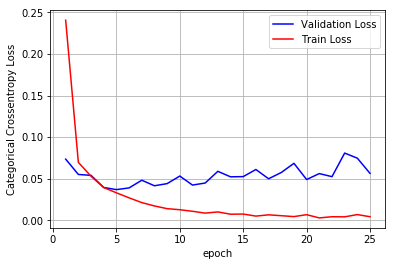

In [11]:
print("***********************************************")
print("Printing the Model Summary")
print(m21_model.summary())
print("***********************************************")

score = m21_model.evaluate(x_test_new, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#ConvNets": 2,
                                    "#Kernels/Filters": '3x3', 
                                    "Padding": '-',
                                    "Stride": '2x2',
                                    "Dropout": '-',
                                    "BatchNormalization": False,
                                    "Regularization": '-',
                                    "TRAIN_LOSS": '{:.5f}'.format(model.history["loss"][n_epochs-1]),
                                    "TEST_LOSS": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]),
                                    "TRAIN_ACC": '{:.5f}'.format(model.history["acc"][n_epochs-1]),
                                    "TEST_ACC": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

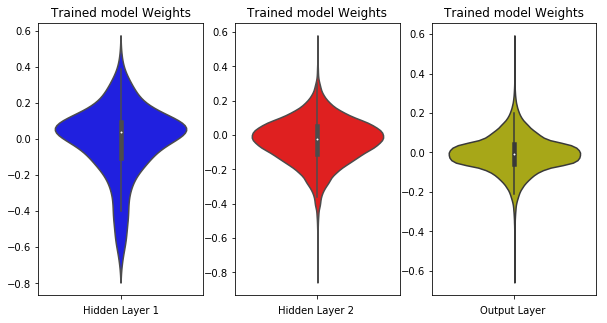

In [12]:
w_after = m21_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 5x5 Filter/Kernel

In [13]:
m22_model = Sequential()

# First Convolutional layer with MaxPooling
m22_model.add(Conv2D(32, kernel_size=(5,5), activation=tf.nn.relu, input_shape=(28,28,1)))
m22_model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional layer with MaxPooling
m22_model.add(Conv2D(64, kernel_size=(5,5), activation=tf.nn.relu))
m22_model.add(MaxPooling2D(pool_size=(2,2)))

# Three dense layers in MLP
m22_model.add(Flatten())
m22_model.add(Dense(128, activation=tf.nn.relu))
m22_model.add(Dense(64, activation=tf.nn.relu))
m22_model.add(Dense(10, activation=tf.nn.softmax))


m22_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = m22_model.fit(x_train_new, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test_new, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2320 - acc: 0.9293 - val_loss: 0.0739 - val_acc: 0.9751
Epoch 2/25
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0696 - acc: 0.9778 - val_loss: 0.0536 - val_acc: 0.9835
Epoch 3/25
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0482 - acc: 0.9848 - val_loss: 0.0520 - val_acc: 0.9840
Epoch 4/25
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0350 - acc: 0.9888 - val_loss: 0.0373 - val_acc: 0.9877
Epoch 5/25
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0296 - acc: 0.9901 - val_loss: 0.0353 - val_acc: 0.9879
Epoch 6/25
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0243 - acc: 0.9923 - val_loss: 0.0391 - val_acc: 0.9889
Epoch 7/25
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0187 - acc: 0.9940 - val_loss: 0

***********************************************
Printing the Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               131200    
_________________________________________________________________
d

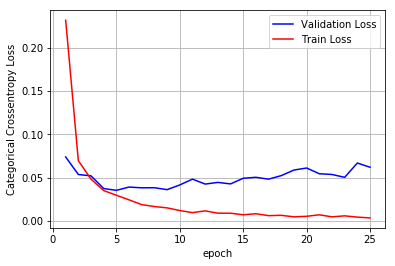

In [14]:
print("***********************************************")
print("Printing the Model Summary")
print(m22_model.summary())
print("***********************************************")

score = m22_model.evaluate(x_test_new, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#ConvNets": 2,
                                    "#Kernels/Filters": '5x5', 
                                    "Padding": '-',
                                    "Stride": '2x2',
                                    "Dropout": '-',
                                    "BatchNormalization": False,
                                    "Regularization": '-',
                                    "TRAIN_LOSS": '{:.5f}'.format(model.history["loss"][n_epochs-1]),
                                    "TEST_LOSS": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]),
                                    "TRAIN_ACC": '{:.5f}'.format(model.history["acc"][n_epochs-1]),
                                    "TEST_ACC": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

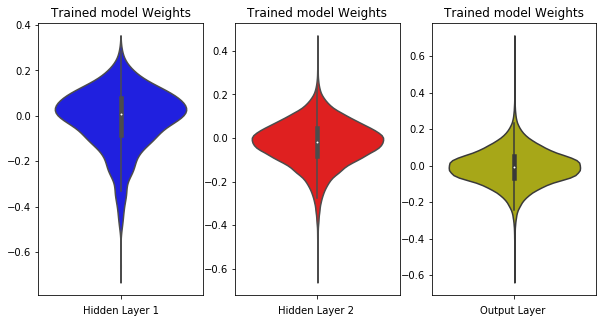

In [15]:
w_after = m22_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 3x3 Filter/Kernel with Dropout and Weight Regularization & Initialization and Batch Normalization

In [16]:
m23_model = Sequential()

# First Convolutional layer with MaxPooling
m23_model.add(Conv2D(32, kernel_size=(3,3), activation=tf.nn.relu, input_shape=(28,28,1), 
                     kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m23_model.add(MaxPooling2D(pool_size=(2,2)))

m23_model.add(Dropout(rate=0.5))

# Second Convolutional layer with MaxPooling
m23_model.add(Conv2D(64, kernel_size=(3,3), activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m23_model.add(MaxPooling2D(pool_size=(2,2)))

m23_model.add(Dropout(rate=0.5))

# Three dense layers in MLP
m23_model.add(Flatten())
m23_model.add(Dense(128, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m23_model.add(BatchNormalization())
m23_model.add(Dropout(rate=0.5))
m23_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m23_model.add(BatchNormalization())
m23_model.add(Dropout(rate=0.5))
m23_model.add(Dense(10, activation=tf.nn.softmax))


m23_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = m23_model.fit(x_train_new, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test_new, y_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 9s 143us/sample - loss: 1.1191 - acc: 0.6388 - val_loss: 0.6570 - val_acc: 0.8005
Epoch 2/25
60000/60000 [==============================] - 8s 130us/sample - loss: 0.4228 - acc: 0.8740 - val_loss: 0.1860 - val_acc: 0.9487
Epoch 3/25
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2772 - acc: 0.9200 - val_loss: 0.1067 - val_acc: 0.9704
Epoch 4/25
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2323 - acc: 0.9350 - val_loss: 0.0883 - val_acc: 0.9761
Epoch 5/25
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2026 - acc: 0.9440 - val_loss: 0.0802 - val_acc: 0.9772
Epoch 6/25
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1786 - acc: 0.9511 - val_loss: 0.0742 - val_acc: 0.

***********************************************
Printing the Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
f

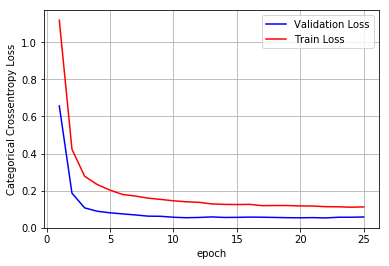

In [17]:
print("***********************************************")
print("Printing the Model Summary")
print(m23_model.summary())
print("***********************************************")

score = m23_model.evaluate(x_test_new, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#ConvNets": 2,
                                    "#Kernels/Filters": '3x3', 
                                    "Padding": '-',
                                    "Stride": '2x2',
                                    "Dropout": True,
                                    "BatchNormalization": True,
                                    "Regularization": 'L2 (0.00001)',
                                    "TRAIN_LOSS": '{:.5f}'.format(model.history["loss"][n_epochs-1]),
                                    "TEST_LOSS": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]),
                                    "TRAIN_ACC": '{:.5f}'.format(model.history["acc"][n_epochs-1]),
                                    "TEST_ACC": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

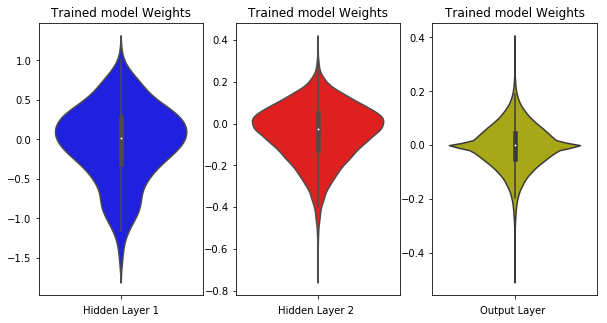

In [18]:
w_after = m23_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 5x5 Kernel/Filter with Dropout, Weight Regularization/ initialization and Batch Normalization

In [19]:
m24_model = Sequential()

# First Convolutional layer with MaxPooling
m24_model.add(Conv2D(32, kernel_size=(5,5), activation=tf.nn.relu, input_shape=(28,28,1), 
                     kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m24_model.add(MaxPooling2D(pool_size=(2,2)))

m24_model.add(Dropout(rate=0.5))

# Second Convolutional layer with MaxPooling
m24_model.add(Conv2D(64, kernel_size=(5,5), activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m24_model.add(MaxPooling2D(pool_size=(2,2)))

m24_model.add(Dropout(rate=0.5))

# Three dense layers in MLP
m24_model.add(Flatten())
m24_model.add(Dense(128, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m24_model.add(BatchNormalization())
m24_model.add(Dropout(rate=0.5))
m24_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m24_model.add(BatchNormalization())
m24_model.add(Dropout(rate=0.5))
m24_model.add(Dense(10, activation=tf.nn.softmax))


m24_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = m24_model.fit(x_train_new, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test_new, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 8s 134us/sample - loss: 1.0503 - acc: 0.6756 - val_loss: 0.1977 - val_acc: 0.9506
Epoch 2/25
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3364 - acc: 0.9034 - val_loss: 0.1054 - val_acc: 0.9712
Epoch 3/25
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2353 - acc: 0.9347 - val_loss: 0.0830 - val_acc: 0.9760
Epoch 4/25
60000/60000 [==============================] - 7s 120us/sample - loss: 0.1901 - acc: 0.9484 - val_loss: 0.0726 - val_acc: 0.9789
Epoch 5/25
60000/60000 [==============================] - 7s 120us/sample - loss: 0.1669 - acc: 0.9546 - val_loss: 0.0611 - val_acc: 0.9834
Epoch 6/25
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1498 - acc: 0.9595 - val_loss: 0.0561 - val_acc: 0.9849
Epoch 7/25
60000/60000 [==============================] - 7s 120us/sample - loss: 0.1355 - acc: 0.9646 - val_l

***********************************************
Printing the Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
f

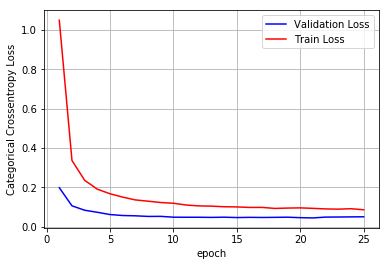

In [20]:
print("***********************************************")
print("Printing the Model Summary")
print(m24_model.summary())
print("***********************************************")

score = m24_model.evaluate(x_test_new, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#ConvNets": 2,
                                    "#Kernels/Filters": '5x5', 
                                    "Padding": '-',
                                    "Stride": '2x2',
                                    "Dropout": True,
                                    "BatchNormalization": True,
                                    "Regularization": 'L2 (0.00001)',
                                    "TRAIN_LOSS": '{:.5f}'.format(model.history["loss"][n_epochs-1]),
                                    "TEST_LOSS": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]),
                                    "TRAIN_ACC": '{:.5f}'.format(model.history["acc"][n_epochs-1]),
                                    "TEST_ACC": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

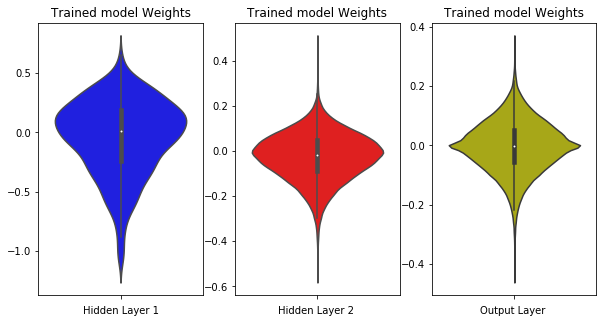

In [21]:
w_after = m24_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3 ConvNet Architecture

In this type of architecture, we will be trying out 3 convolution layer along with 3 maxpooling layer for each.

### 3x3 Filter/Kernel

In [22]:
m31_model = Sequential()

# First Convolutional layer with MaxPooling
m31_model.add(Conv2D(32, kernel_size=(3,3), activation=tf.nn.relu, input_shape=(28,28,1)))
m31_model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional layer with MaxPooling
m31_model.add(Conv2D(64, kernel_size=(3,3), activation=tf.nn.relu))
m31_model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolutional layer with MaxPooling
m31_model.add(Conv2D(32, kernel_size=(3,3), activation=tf.nn.relu))
m31_model.add(MaxPooling2D(pool_size=(2,2)))

# Three dense layers in MLP
m31_model.add(Flatten())
m31_model.add(Dense(128, activation=tf.nn.relu))
m31_model.add(Dense(64, activation=tf.nn.relu))
m31_model.add(Dense(10, activation=tf.nn.softmax))


m31_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = m31_model.fit(x_train_new, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test_new, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4676 - acc: 0.8478 - val_loss: 0.1706 - val_acc: 0.9462
Epoch 2/25
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1543 - acc: 0.9522 - val_loss: 0.1296 - val_acc: 0.9587
Epoch 3/25
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1131 - acc: 0.9648 - val_loss: 0.0979 - val_acc: 0.9701
Epoch 4/25
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0940 - acc: 0.9704 - val_loss: 0.0994 - val_acc: 0.9706
Epoch 5/25
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0804 - acc: 0.9750 - val_loss: 0.1023 - val_acc: 0.9691
Epoch 6/25
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0691 - acc: 0.9785 - val_loss: 0.0797 - val_acc: 0.9761
Epoch 7/25
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0607 - acc: 0.9808 - val_l

***********************************************
Printing the Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
f

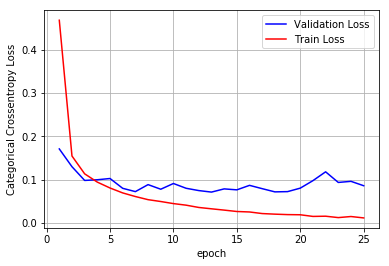

In [23]:
print("***********************************************")
print("Printing the Model Summary")
print(m31_model.summary())
print("***********************************************")

score = m31_model.evaluate(x_test_new, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#ConvNets": 3,
                                    "#Kernels/Filters": '3x3', 
                                    "Padding": '-',
                                    "Stride": '2x2',
                                    "Dropout": '-',
                                    "BatchNormalization": False,
                                    "Regularization": '-',
                                    "TRAIN_LOSS": '{:.5f}'.format(model.history["loss"][n_epochs-1]),
                                    "TEST_LOSS": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]),
                                    "TRAIN_ACC": '{:.5f}'.format(model.history["acc"][n_epochs-1]),
                                    "TEST_ACC": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

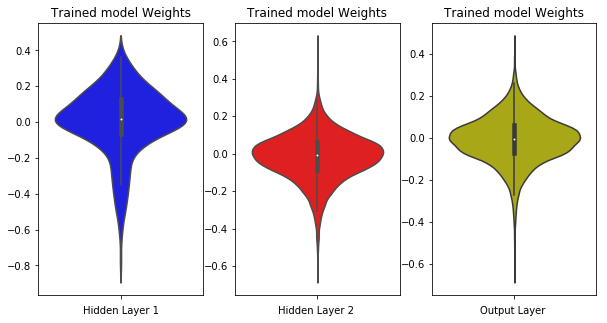

In [24]:
w_after = m31_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 5x5 Kernel/Filter

In [25]:
m32_model = Sequential()

# First Convolutional layer with MaxPooling
m32_model.add(Conv2D(32, kernel_size=(5,5), padding="same",  activation=tf.nn.relu, input_shape=(28,28,1)))
m32_model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional layer with MaxPooling
m32_model.add(Conv2D(64, kernel_size=(5,5), padding="same", activation=tf.nn.relu))
m32_model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolutional layer with MaxPooling
m32_model.add(Conv2D(32, kernel_size=(5,5), padding="same", activation=tf.nn.relu))
m32_model.add(MaxPooling2D(pool_size=(2,2)))

# Three dense layers in MLP
m32_model.add(Flatten())
m32_model.add(Dense(128, activation=tf.nn.relu))
m32_model.add(Dense(64, activation=tf.nn.relu))
m32_model.add(Dense(10, activation=tf.nn.softmax))


m32_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = m32_model.fit(x_train_new, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test_new, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 8s 138us/sample - loss: 0.2470 - acc: 0.9249 - val_loss: 0.0758 - val_acc: 0.9760
Epoch 2/25
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0691 - acc: 0.9786 - val_loss: 0.0501 - val_acc: 0.9839
Epoch 3/25
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0485 - acc: 0.9851 - val_loss: 0.0479 - val_acc: 0.9841
Epoch 4/25
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0383 - acc: 0.9875 - val_loss: 0.0378 - val_acc: 0.9888
Epoch 5/25
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0329 - acc: 0.9895 - val_loss: 0.0419 - val_acc: 0.9874
Epoch 6/25
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0250 - acc: 0.9916 - val_loss: 0.0416 - val_acc: 0.9879
Epoch 7/25
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0224 - acc: 0.9926 - val_l

***********************************************
Printing the Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 32)          51232     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
f

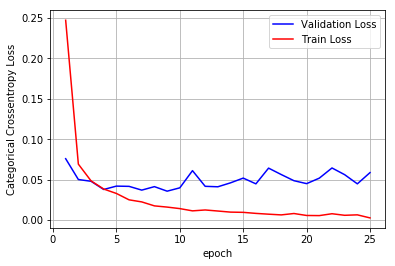

In [26]:
print("***********************************************")
print("Printing the Model Summary")
print(m32_model.summary())
print("***********************************************")

score = m32_model.evaluate(x_test_new, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])


final_output = final_output.append({"#ConvNets": 3,
                                    "#Kernels/Filters": '5x5', 
                                    "Padding": 'same',
                                    "Stride": '2x2',
                                    "Dropout": False,
                                    "BatchNormalization": False,
                                    "Regularization": '-',
                                    "TRAIN_LOSS": '{:.5f}'.format(model.history["loss"][n_epochs-1]),
                                    "TEST_LOSS": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]),
                                    "TRAIN_ACC": '{:.5f}'.format(model.history["acc"][n_epochs-1]),
                                    "TEST_ACC": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

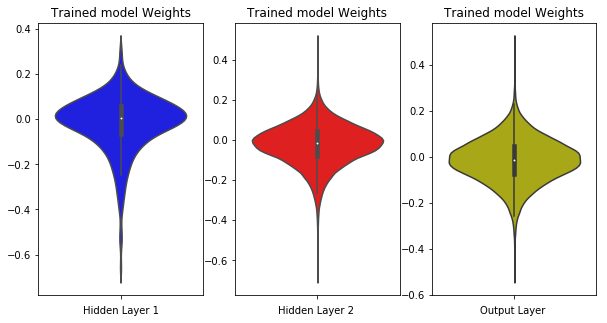

In [27]:
w_after = m32_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 3x3 Kernel/Filter with Dropout and Weights Regularization & Initialization and Batch Normalization

In [28]:
m33_model = Sequential()

# First Convolutional layer with MaxPooling
m33_model.add(Conv2D(32, kernel_size=(3,3), activation=tf.nn.relu, input_shape=(28,28,1), 
                     kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m33_model.add(MaxPooling2D(pool_size=(2,2)))

m33_model.add(Dropout(rate=0.5))

# Second Convolutional layer with MaxPooling
m33_model.add(Conv2D(64, kernel_size=(3,3), activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m33_model.add(MaxPooling2D(pool_size=(2,2)))

m33_model.add(Dropout(rate=0.5))

# Third Convolutional layer with MaxPooling
m33_model.add(Conv2D(32, kernel_size=(3,3), activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m33_model.add(MaxPooling2D(pool_size=(2,2)))

m33_model.add(Dropout(rate=0.5))

# Three dense layers in MLP
m33_model.add(Flatten())
m33_model.add(Dense(128, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m33_model.add(BatchNormalization())
m33_model.add(Dropout(rate=0.5))
m33_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m33_model.add(BatchNormalization())
m33_model.add(Dropout(rate=0.5))
m33_model.add(Dense(10, activation=tf.nn.softmax))


m33_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = m33_model.fit(x_train_new, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test_new, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 10s 161us/sample - loss: 2.4852 - acc: 0.1963 - val_loss: 2.2686 - val_acc: 0.1730
Epoch 2/25
60000/60000 [==============================] - 8s 140us/sample - loss: 1.5537 - acc: 0.4574 - val_loss: 0.9359 - val_acc: 0.6998
Epoch 3/25
60000/60000 [==============================] - 8s 140us/sample - loss: 1.1184 - acc: 0.6223 - val_loss: 0.5322 - val_acc: 0.8721
Epoch 4/25
60000/60000 [==============================] - 8s 139us/sample - loss: 0.9041 - acc: 0.7059 - val_loss: 0.3630 - val_acc: 0.9153
Epoch 5/25
60000/60000 [==============================] - 8s 138us/sample - loss: 0.7661 - acc: 0.7604 - val_loss: 0.2774 - val_acc: 0.9300
Epoch 6/25
60000/60000 [==============================] - 8s 139us/sample - loss: 0.6918 - acc: 0.7858 - val_loss: 0.2475 - val_acc: 0.9345
Epoch 7/25
60000/60000 [==============================] - 8s 139us/sample - loss: 0.6360 - acc: 0.8064 - val_

***********************************************
Printing the Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
c

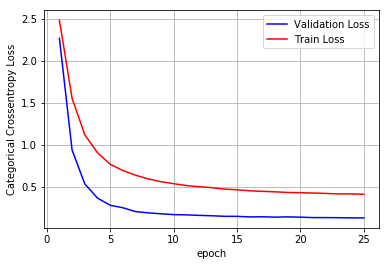

In [29]:
print("***********************************************")
print("Printing the Model Summary")
print(m33_model.summary())
print("***********************************************")

score = m33_model.evaluate(x_test_new, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#ConvNets": 3,
                                    "#Kernels/Filters": '3x3', 
                                    "Padding": '-',
                                    "Stride": '2x2',
                                    "Dropout": True,
                                    "BatchNormalization": True,
                                    "Regularization": 'L2 (0.00001)',
                                    "TRAIN_LOSS": '{:.5f}'.format(model.history["loss"][n_epochs-1]),
                                    "TEST_LOSS": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]),
                                    "TRAIN_ACC": '{:.5f}'.format(model.history["acc"][n_epochs-1]),
                                    "TEST_ACC": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

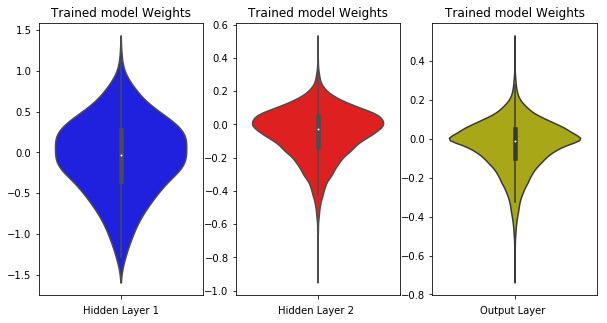

In [30]:
w_after = m33_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 5x5 Kernel/Filter with Dropout, Weight Regularization/ initialization and Batch Normalization

In [31]:
m34_model = Sequential()

# First Convolutional layer with MaxPooling
m34_model.add(Conv2D(32, kernel_size=(5,5), activation=tf.nn.relu, padding="same", input_shape=(28,28,1), 
                     kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m34_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m34_model.add(Dropout(rate=0.5))

# Second Convolutional layer with MaxPooling
m34_model.add(Conv2D(64, kernel_size=(5,5), activation=tf.nn.relu, padding="same",
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m34_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m34_model.add(Dropout(rate=0.5))

# Third Convolutional layer with MaxPooling
m34_model.add(Conv2D(32, kernel_size=(5,5), activation=tf.nn.relu, padding="same",
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m34_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m34_model.add(Dropout(rate=0.5))

# Fourth Convolutional layer with MaxPooling
m34_model.add(Conv2D(32, kernel_size=(5,5), activation=tf.nn.relu, padding="same",
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m34_model.add(MaxPooling2D(pool_size=(2,2)))

m34_model.add(Dropout(rate=0.5))

# Fifth Convolutional layer with MaxPooling
m34_model.add(Conv2D(32, kernel_size=(5,5), activation=tf.nn.relu, padding="same",
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m34_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m34_model.add(Dropout(rate=0.5))

# Three dense layers in MLP
m34_model.add(Flatten())
m34_model.add(Dense(128, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m34_model.add(BatchNormalization())
m34_model.add(Dropout(rate=0.5))
m34_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m34_model.add(BatchNormalization())
m34_model.add(Dropout(rate=0.5))
m34_model.add(Dense(10, activation=tf.nn.softmax))


m34_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = m34_model.fit(x_train_new, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test_new, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 12s 199us/sample - loss: 2.4554 - acc: 0.1821 - val_loss: 3.1332 - val_acc: 0.1135
Epoch 2/25
60000/60000 [==============================] - 11s 178us/sample - loss: 1.6683 - acc: 0.3192 - val_loss: 2.8329 - val_acc: 0.1135
Epoch 3/25
60000/60000 [==============================] - 11s 178us/sample - loss: 1.4748 - acc: 0.3810 - val_loss: 2.7105 - val_acc: 0.1235
Epoch 4/25
60000/60000 [==============================] - 11s 178us/sample - loss: 1.3223 - acc: 0.4378 - val_loss: 1.9870 - val_acc: 0.2274
Epoch 5/25
60000/60000 [==============================] - 11s 178us/sample - loss: 1.1281 - acc: 0.5334 - val_loss: 1.4269 - val_acc: 0.3319
Epoch 6/25
60000/60000 [==============================] - 11s 178us/sample - loss: 0.9818 - acc: 0.6104 - val_loss: 1.2867 - val_acc: 0.3763
Epoch 7/25
60000/60000 [==============================] - 11s 178us/sample - loss: 0.8646 - acc: 0.6875 

***********************************************
Printing the Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
c

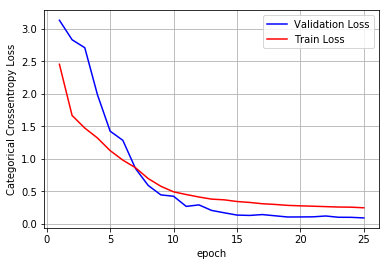

In [32]:
print("***********************************************")
print("Printing the Model Summary")
print(m34_model.summary())
print("***********************************************")

score = m34_model.evaluate(x_test_new, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#ConvNets": 3,
                                    "#Kernels/Filters": '5x5', 
                                    "Padding": 'same',
                                    "Stride": '2x2',
                                    "Dropout": True,
                                    "BatchNormalization": True,
                                    "Regularization": 'L2 (0.00001)',
                                    "TRAIN_LOSS": '{:.5f}'.format(model.history["loss"][n_epochs-1]),
                                    "TEST_LOSS": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]),
                                    "TRAIN_ACC": '{:.5f}'.format(model.history["acc"][n_epochs-1]),
                                    "TEST_ACC": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

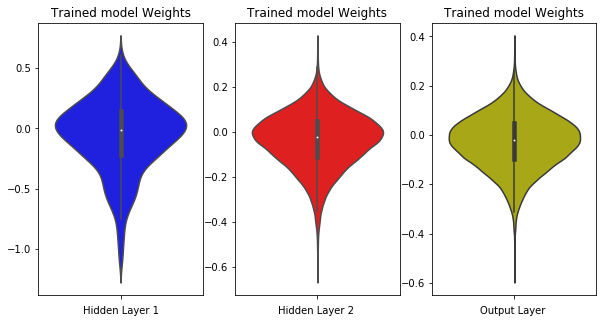

In [33]:
w_after = m34_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 5 ConvNet Architecture

In this type of architecture, we will be trying out 5 convolution layers along with 5 maxpooling layer for each.

### 3x3 Kernel/Filter

In [34]:
m51_model = Sequential()

# First Convolutional layer with MaxPooling
m51_model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=(28,28,1)))
m51_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

# Second Convolutional layer with MaxPooling
m51_model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation=tf.nn.relu))
m51_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

# Third Convolutional layer with MaxPooling
m51_model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation=tf.nn.relu))
m51_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

# Fourth Convolutional layer with MaxPooling
m51_model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation=tf.nn.relu))
m51_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

# Fifth Convolutional layer with MaxPooling
m51_model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation=tf.nn.relu))
m51_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

# Three dense layers in MLP
m51_model.add(Flatten())
m51_model.add(Dense(128, activation=tf.nn.relu))
m51_model.add(BatchNormalization())
m51_model.add(Dropout(rate=0.5))
m51_model.add(Dense(64, activation=tf.nn.relu))
m51_model.add(BatchNormalization())
m51_model.add(Dropout(rate=0.5))
m51_model.add(Dense(10, activation=tf.nn.softmax))


m51_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = m51_model.fit(x_train_new, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test_new, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 11s 191us/sample - loss: 0.4281 - acc: 0.8713 - val_loss: 0.4972 - val_acc: 0.8493
Epoch 2/25
60000/60000 [==============================] - 10s 169us/sample - loss: 0.1139 - acc: 0.9693 - val_loss: 0.0688 - val_acc: 0.9798
Epoch 3/25
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0808 - acc: 0.9776 - val_loss: 0.0555 - val_acc: 0.9821
Epoch 4/25
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0646 - acc: 0.9819 - val_loss: 0.1208 - val_acc: 0.9653
Epoch 5/25
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0543 - acc: 0.9851 - val_loss: 0.0998 - val_acc: 0.9732
Epoch 6/25
60000/60000 [==============================] - 10s 168us/sample - loss: 0.0415 - acc: 0.9882 - val_loss: 0.0601 - val_acc: 0.9830
Epoch 7/25
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0403 - acc: 0.9884 

***********************************************
Printing the Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
c

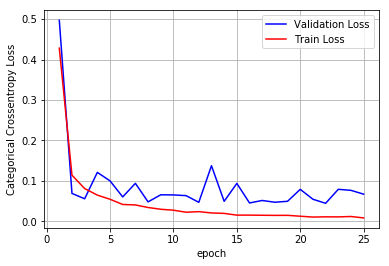

In [35]:
print("***********************************************")
print("Printing the Model Summary")
print(m51_model.summary())
print("***********************************************")

score = m51_model.evaluate(x_test_new, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#ConvNets": 5,
                                    "#Kernels/Filters": '3x3', 
                                    "Padding": 'same',
                                    "Stride": '2x2',
                                    "Dropout": False,
                                    "BatchNormalization": False,
                                    "Regularization": '-',
                                    "TRAIN_LOSS": '{:.5f}'.format(model.history["loss"][n_epochs-1]),
                                    "TEST_LOSS": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]),
                                    "TRAIN_ACC": '{:.5f}'.format(model.history["acc"][n_epochs-1]),
                                    "TEST_ACC": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

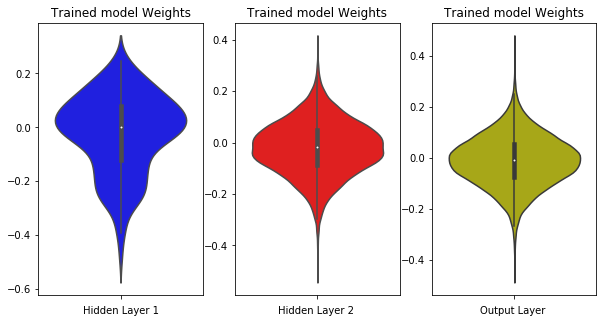

In [36]:
w_after = m51_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 5x5 Kernel/Filter

In [37]:
m52_model = Sequential()

# First Convolutional layer with MaxPooling
m52_model.add(Conv2D(32, kernel_size=(5,5), padding="same", activation=tf.nn.relu, input_shape=(28,28,1)))
m52_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

# Second Convolutional layer with MaxPooling
m52_model.add(Conv2D(64, kernel_size=(5,5), padding="same", activation=tf.nn.relu))
m52_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

# Third Convolutional layer with MaxPooling
m52_model.add(Conv2D(64, kernel_size=(5,5), padding="same", activation=tf.nn.relu))
m52_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

# Fourth Convolutional layer with MaxPooling
m52_model.add(Conv2D(64, kernel_size=(5,5), padding="same", activation=tf.nn.relu))
m52_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

# Fifth Convolutional layer with MaxPooling
m52_model.add(Conv2D(32, kernel_size=(5,5), padding="same", activation=tf.nn.relu))
m52_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

# Three dense layers in MLP
m52_model.add(Flatten())
m52_model.add(Dense(128, activation=tf.nn.relu))
m52_model.add(BatchNormalization())
m52_model.add(Dropout(rate=0.5))
m52_model.add(Dense(64, activation=tf.nn.relu))
m52_model.add(BatchNormalization())
m52_model.add(Dropout(rate=0.5))
m52_model.add(Dense(10, activation=tf.nn.softmax))


m52_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = m52_model.fit(x_train_new, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test_new, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 12s 203us/sample - loss: 0.4521 - acc: 0.8658 - val_loss: 0.2125 - val_acc: 0.9701
Epoch 2/25
60000/60000 [==============================] - 11s 180us/sample - loss: 0.1033 - acc: 0.9724 - val_loss: 0.1966 - val_acc: 0.9422
Epoch 3/25
60000/60000 [==============================] - 11s 181us/sample - loss: 0.0690 - acc: 0.9812 - val_loss: 0.0548 - val_acc: 0.9824
Epoch 4/25
60000/60000 [==============================] - 11s 183us/sample - loss: 0.0572 - acc: 0.9846 - val_loss: 0.1218 - val_acc: 0.9678
Epoch 5/25
60000/60000 [==============================] - 11s 181us/sample - loss: 0.0458 - acc: 0.9878 - val_loss: 0.1881 - val_acc: 0.9527
Epoch 6/25
60000/60000 [==============================] - 11s 180us/sample - loss: 0.0402 - acc: 0.9888 - val_loss: 0.0530 - val_acc: 0.9865
Epoch 7/25
60000/60000 [==============================] - 11s 181us/sample - loss: 0.0326 - acc: 0.9909 

***********************************************
Printing the Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 64)          102464    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
c

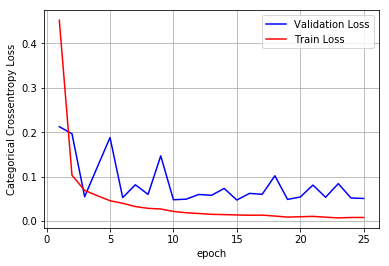

In [38]:
print("***********************************************")
print("Printing the Model Summary")
print(m52_model.summary())
print("***********************************************")

score = m52_model.evaluate(x_test_new, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#ConvNets": 5,
                                    "#Kernels/Filters": '5x5', 
                                    "Padding": 'same',
                                    "Stride": '2x2',
                                    "Dropout": False,
                                    "BatchNormalization": False,
                                    "Regularization": '-',
                                    "TRAIN_LOSS": '{:.5f}'.format(model.history["loss"][n_epochs-1]),
                                    "TEST_LOSS": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]),
                                    "TRAIN_ACC": '{:.5f}'.format(model.history["acc"][n_epochs-1]),
                                    "TEST_ACC": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

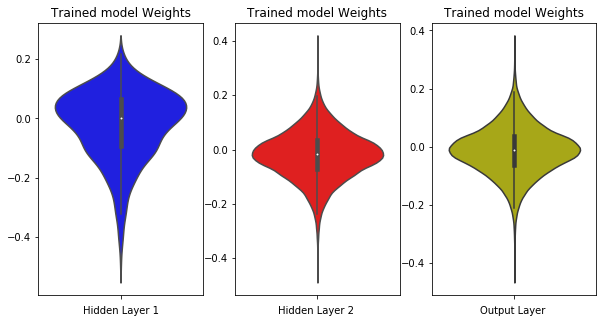

In [39]:
w_after = m52_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 3x3 Filter/Kernel with Dropout and Weight Regularization & Initialization and Batch Normalization

In [40]:
m53_model = Sequential()

# First Convolutional layer with MaxPooling
m53_model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=(28,28,1),
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m53_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m53_model.add(Dropout(rate=0.5))

# Second Convolutional layer with MaxPooling
m53_model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m53_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m53_model.add(Dropout(rate=0.5))

# Third Convolutional layer with MaxPooling
m53_model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m53_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m53_model.add(Dropout(rate=0.5))

# Fourth Convolutional layer with MaxPooling
m53_model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m53_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m53_model.add(Dropout(rate=0.5))

# Fifth Convolutional layer with MaxPooling
m53_model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m53_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m53_model.add(Dropout(rate=0.5))

# Three dense layers in MLP
m53_model.add(Flatten())
m53_model.add(Dense(128, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m53_model.add(BatchNormalization())
m53_model.add(Dropout(rate=0.5))
m53_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m53_model.add(BatchNormalization())
m53_model.add(Dropout(rate=0.5))
m53_model.add(Dense(10, activation=tf.nn.softmax))


m53_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = m53_model.fit(x_train_new, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test_new, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 13s 212us/sample - loss: 2.5089 - acc: 0.1661 - val_loss: 3.4041 - val_acc: 0.1135
Epoch 2/25
60000/60000 [==============================] - 11s 186us/sample - loss: 1.8547 - acc: 0.2749 - val_loss: 2.9561 - val_acc: 0.1135
Epoch 3/25
60000/60000 [==============================] - 11s 186us/sample - loss: 1.5292 - acc: 0.3967 - val_loss: 1.8776 - val_acc: 0.2613
Epoch 4/25
60000/60000 [==============================] - 11s 186us/sample - loss: 1.2578 - acc: 0.5101 - val_loss: 1.3808 - val_acc: 0.3862
Epoch 5/25
60000/60000 [==============================] - 11s 186us/sample - loss: 1.0671 - acc: 0.6069 - val_loss: 0.8838 - val_acc: 0.6456
Epoch 6/25
60000/60000 [==============================] - 11s 186us/sample - loss: 0.8918 - acc: 0.6987 - val_loss: 0.6278 - val_acc: 0.8033
Epoch 7/25
60000/60000 [==============================] - 11s 184us/sample - loss: 0.7286 - acc: 0.7781 

***********************************************
Printing the Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
c

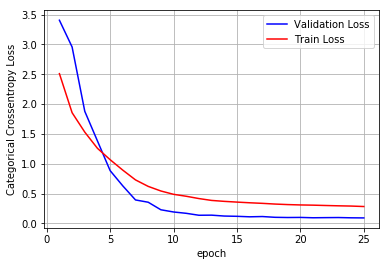

In [41]:
print("***********************************************")
print("Printing the Model Summary")
print(m53_model.summary())
print("***********************************************")

score = m53_model.evaluate(x_test_new, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#ConvNets": 5,
                                    "#Kernels/Filters": '3x3', 
                                    "Padding": 'same',
                                    "Stride": '2x2',
                                    "Dropout": True,
                                    "BatchNormalization": True,
                                    "Regularization": 'L2 (0.00001)',
                                    "TRAIN_LOSS": '{:.5f}'.format(model.history["loss"][n_epochs-1]),
                                    "TEST_LOSS": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]),
                                    "TRAIN_ACC": '{:.5f}'.format(model.history["acc"][n_epochs-1]),
                                    "TEST_ACC": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

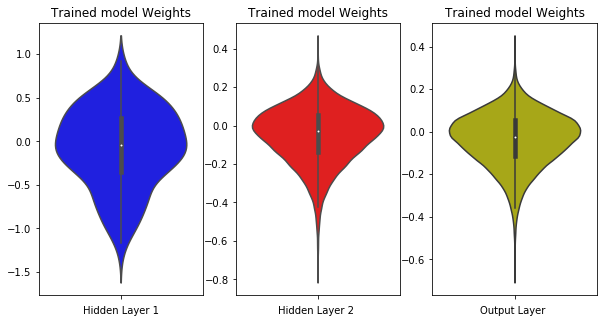

In [42]:
w_after = m53_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 5x5 Kernel/Filter with Dropout, Weight Regularization/ initialization and Batch Normalization

In [43]:
m54_model = Sequential()

# First Convolutional layer with MaxPooling
m54_model.add(Conv2D(32, kernel_size=(5,5), padding="same", activation=tf.nn.relu, input_shape=(28,28,1),
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m54_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m54_model.add(Dropout(rate=0.5))

# Second Convolutional layer with MaxPooling
m54_model.add(Conv2D(64, kernel_size=(5,5), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m54_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m54_model.add(Dropout(rate=0.5))

# Third Convolutional layer with MaxPooling
m54_model.add(Conv2D(64, kernel_size=(5,5), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m54_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m54_model.add(Dropout(rate=0.5))

# Fourth Convolutional layer with MaxPooling
m54_model.add(Conv2D(64, kernel_size=(5,5), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m54_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m54_model.add(Dropout(rate=0.5))

# Fifth Convolutional layer with MaxPooling
m54_model.add(Conv2D(32, kernel_size=(5,5), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m54_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m54_model.add(Dropout(rate=0.5))

# Three dense layers in MLP
m54_model.add(Flatten())
m54_model.add(Dense(128, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m54_model.add(BatchNormalization())
m54_model.add(Dropout(rate=0.5))
m54_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m54_model.add(BatchNormalization())
m54_model.add(Dropout(rate=0.5))
m54_model.add(Dense(10, activation=tf.nn.softmax))


m54_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = m54_model.fit(x_train_new, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test_new, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 13s 225us/sample - loss: 2.4886 - acc: 0.1789 - val_loss: 3.3732 - val_acc: 0.1135
Epoch 2/25
60000/60000 [==============================] - 12s 198us/sample - loss: 1.7058 - acc: 0.3115 - val_loss: 2.7586 - val_acc: 0.1291
Epoch 3/25
60000/60000 [==============================] - 12s 198us/sample - loss: 1.4386 - acc: 0.4155 - val_loss: 2.0391 - val_acc: 0.1831
Epoch 4/25
60000/60000 [==============================] - 12s 198us/sample - loss: 1.1361 - acc: 0.5479 - val_loss: 0.8498 - val_acc: 0.6023
Epoch 5/25
60000/60000 [==============================] - 12s 199us/sample - loss: 0.8199 - acc: 0.7095 - val_loss: 0.5801 - val_acc: 0.7595
Epoch 6/25
60000/60000 [==============================] - 12s 198us/sample - loss: 0.6351 - acc: 0.7962 - val_loss: 0.4996 - val_acc: 0.7833
Epoch 7/25
60000/60000 [==============================] - 12s 198us/sample - loss: 0.5185 - acc: 0.8469 

***********************************************
Printing the Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
c

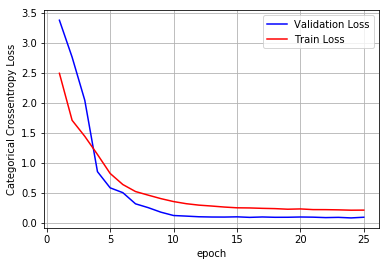

In [44]:
print("***********************************************")
print("Printing the Model Summary")
print(m54_model.summary())
print("***********************************************")

score = m54_model.evaluate(x_test_new, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#ConvNets": 5,
                                    "#Kernels/Filters": '5x5', 
                                    "Padding": 'same',
                                    "Stride": '2x2',
                                    "Dropout": True,
                                    "BatchNormalization": True,
                                    "Regularization": 'L2 (0.00001)',
                                    "TRAIN_LOSS": '{:.5f}'.format(model.history["loss"][n_epochs-1]),
                                    "TEST_LOSS": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]),
                                    "TRAIN_ACC": '{:.5f}'.format(model.history["acc"][n_epochs-1]),
                                    "TEST_ACC": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

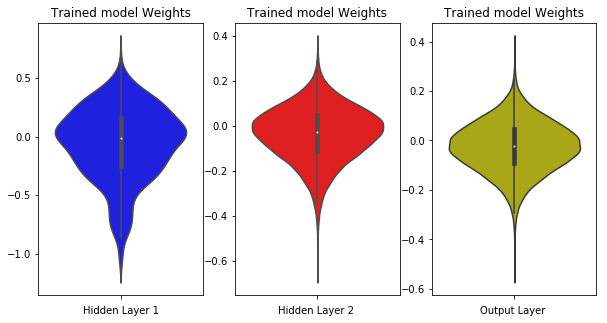

In [45]:
w_after = m54_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 7 Convnet

In this type of architecture, we will be trying out 7 convolution layer along with 2 maxpooling layer after 3 convolution layers.

### 3x3 Filter/Kernel with Dropout and Weight Regularization & Initialization and Batch Normalization

In [46]:
m71_model = Sequential()

# First Convolutional layer
m71_model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=(28,28,1),
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))

m71_model.add(Dropout(rate=0.5))

# Second Convolutional layer
m71_model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))

m71_model.add(Dropout(rate=0.5))

# Third Convolutional layer with MaxPooling
m71_model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))

m71_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m71_model.add(Dropout(rate=0.5))

# Fourth Convolutional layer
m71_model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))

m71_model.add(Dropout(rate=0.5))

# Fifth Convolutional layer
m71_model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))

m71_model.add(Dropout(rate=0.5))

# Sixth Convolutional layer with MaxPooling
m71_model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))

m71_model.add(Dropout(rate=0.5))

m71_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

# Seventh Convolutional layer
m71_model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))

m71_model.add(Dropout(rate=0.5))

# Three dense layers in MLP
m71_model.add(Flatten())
m71_model.add(Dense(128, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m71_model.add(BatchNormalization())
m71_model.add(Dropout(rate=0.5))
m71_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m71_model.add(BatchNormalization())
m71_model.add(Dropout(rate=0.5))
m71_model.add(Dense(10, activation=tf.nn.softmax))


m71_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = m71_model.fit(x_train_new, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test_new, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 30s 501us/sample - loss: 1.4084 - acc: 0.5541 - val_loss: 2.7845 - val_acc: 0.2441
Epoch 2/25
60000/60000 [==============================] - 28s 464us/sample - loss: 0.5161 - acc: 0.8457 - val_loss: 2.0809 - val_acc: 0.3799
Epoch 3/25
60000/60000 [==============================] - 28s 462us/sample - loss: 0.3433 - acc: 0.9033 - val_loss: 2.0207 - val_acc: 0.3976
Epoch 4/25
60000/60000 [==============================] - 28s 462us/sample - loss: 0.2640 - acc: 0.9283 - val_loss: 1.5245 - val_acc: 0.4791
Epoch 5/25
60000/60000 [==============================] - 28s 463us/sample - loss: 0.2180 - acc: 0.9416 - val_loss: 1.1278 - val_acc: 0.6101
Epoch 6/25
60000/60000 [==============================] - 28s 464us/sample - loss: 0.1915 - acc: 0.9501 - val_loss: 0.9953 - val_acc: 0.6542
Epoch 7/25
60000/60000 [==============================] - 28s 461us/sample - loss: 0.1694 - acc: 0.9563 

***********************************************
Printing the Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_38 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_39 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
d

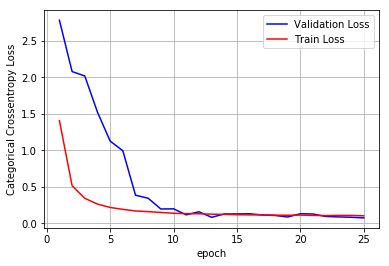

In [47]:
print("***********************************************")
print("Printing the Model Summary")
print(m71_model.summary())
print("***********************************************")

score = m71_model.evaluate(x_test_new, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#ConvNets": 7,
                                    "#Kernels/Filters": '3x3', 
                                    "Padding": 'same',
                                    "Stride": '2x2',
                                    "Dropout": True,
                                    "BatchNormalization": True,
                                    "Regularization": 'L2 (0.00001)',
                                    "TRAIN_LOSS": '{:.5f}'.format(model.history["loss"][n_epochs-1]),
                                    "TEST_LOSS": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]),
                                    "TRAIN_ACC": '{:.5f}'.format(model.history["acc"][n_epochs-1]),
                                    "TEST_ACC": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

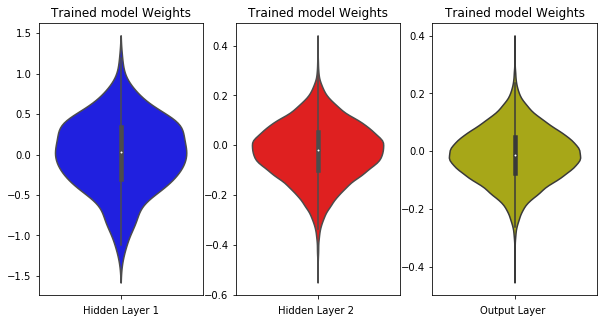

In [48]:
w_after = m71_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 5x5 Filter/Kernel with Dropout and Weight Regularization & Initialization and Batch Normalization

In [49]:
m72_model = Sequential()

# First Convolutional layer
m72_model.add(Conv2D(32, kernel_size=(5,5), padding="same", activation=tf.nn.relu, input_shape=(28,28,1),
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))

m72_model.add(Dropout(rate=0.5))

# Second Convolutional layer
m72_model.add(Conv2D(64, kernel_size=(5,5), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))

m72_model.add(Dropout(rate=0.5))

# Third Convolutional layer with MaxPooling
m72_model.add(Conv2D(64, kernel_size=(5,5), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))


m72_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

m72_model.add(Dropout(rate=0.5))

# Fourth Convolutional layer
m72_model.add(Conv2D(64, kernel_size=(5,5), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))

m72_model.add(Dropout(rate=0.5))

# Fifth Convolutional layer
m72_model.add(Conv2D(64, kernel_size=(5,5), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))

m72_model.add(Dropout(rate=0.5))

# Sixth Convolutional layer with MaxPooling
m72_model.add(Conv2D(32, kernel_size=(5,5), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))

m72_model.add(Dropout(rate=0.5))

m72_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

# Seventh Convolutional layer
m72_model.add(Conv2D(32, kernel_size=(5,5), padding="same", activation=tf.nn.relu,
                    kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))

m72_model.add(Dropout(rate=0.5))

# Three dense layers in MLP
m72_model.add(Flatten())
m72_model.add(Dense(128, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m72_model.add(BatchNormalization())
m72_model.add(Dropout(rate=0.5))
m72_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
m72_model.add(BatchNormalization())
m72_model.add(Dropout(rate=0.5))
m72_model.add(Dense(10, activation=tf.nn.softmax))


m72_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = m72_model.fit(x_train_new, y_train, epochs=n_epochs, batch_size=batchsize, verbose=1, validation_data=(x_test_new, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 35s 582us/sample - loss: 1.7129 - acc: 0.4547 - val_loss: 2.8738 - val_acc: 0.2315
Epoch 2/25
60000/60000 [==============================] - 32s 536us/sample - loss: 0.4255 - acc: 0.8813 - val_loss: 1.8267 - val_acc: 0.3489
Epoch 3/25
60000/60000 [==============================] - 32s 536us/sample - loss: 0.2254 - acc: 0.9433 - val_loss: 0.2794 - val_acc: 0.9288
Epoch 4/25
60000/60000 [==============================] - 32s 536us/sample - loss: 0.1759 - acc: 0.9552 - val_loss: 0.5969 - val_acc: 0.8117
Epoch 5/25
60000/60000 [==============================] - 32s 534us/sample - loss: 0.1442 - acc: 0.9658 - val_loss: 0.1090 - val_acc: 0.9773
Epoch 6/25
60000/60000 [==============================] - 32s 535us/sample - loss: 0.1293 - acc: 0.9703 - val_loss: 0.1447 - val_acc: 0.9680
Epoch 7/25
60000/60000 [==============================] - 32s 535us/sample - loss: 0.1197 - acc: 0.9730 

***********************************************
Printing the Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
dropout_47 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 28, 28, 64)        51264     
_________________________________________________________________
dropout_48 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 28, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
d

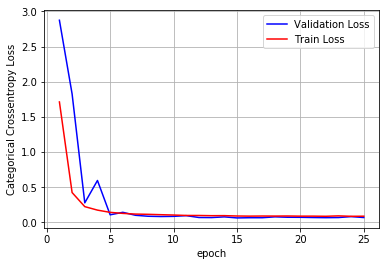

In [50]:
print("***********************************************")
print("Printing the Model Summary")
print(m72_model.summary())
print("***********************************************")

score = m72_model.evaluate(x_test_new, y_test)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

final_output = final_output.append({"#ConvNets": 7,
                                    "#Kernels/Filters": '5x5', 
                                    "Padding": 'same',
                                    "Stride": '2x2',
                                    "Dropout": True,
                                    "BatchNormalization": True,
                                    "Regularization": 'L2 (0.00001)',
                                    "TRAIN_LOSS": '{:.5f}'.format(model.history["loss"][n_epochs-1]),
                                    "TEST_LOSS": '{:.5f}'.format(model.history["val_loss"][n_epochs-1]),
                                    "TRAIN_ACC": '{:.5f}'.format(model.history["acc"][n_epochs-1]),
                                    "TEST_ACC": '{:.5f}'.format(model.history["val_acc"][n_epochs-1])}, ignore_index=True)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,n_epochs+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

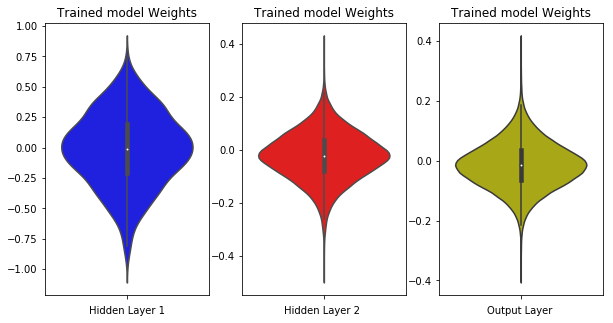

In [51]:
w_after = m72_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Conclusion

In [52]:
final_output

,#ConvNets,#Kernels/Filters,Padding,Stride,Dropout,BatchNormalization,Regularization,TRAIN_LOSS,TEST_LOSS,TRAIN_ACC,TEST_ACC
0,2,3x3,-,2x2,-,False,-,0.00432,0.05639,0.99870,0.98830
1,2,5x5,-,2x2,-,False,-,0.00341,0.06200,0.99898,0.98870
2,2,3x3,-,2x2,True,True,L2 (0.00001),0.11191,0.05771,0.97355,0.98810
3,2,5x5,-,2x2,True,True,L2 (0.00001),0.08533,0.04970,0.98045,0.98990
4,3,3x3,-,2x2,-,False,-,0.01136,0.08567,0.99605,0.98120
5,3,5x5,same,2x2,False,False,-,0.00263,0.05867,0.99938,0.98900
6,3,3x3,-,2x2,True,True,L2 (0.00001),0.40877,0.12611,0.88702,0.96790
7,3,5x5,same,2x2,True,True,L2 (0.00001),0.24883,0.09296,0.94485,0.98210
8,5,3x3,same,2x2,False,False,-,0.00816,0.06690,0.99763,0.98790
9,5,5x5,same,2x2,False,False,-,0.00813,0.05095,0.99762,0.98990


In this task, We tried Convolution Neural Networks on MNIST Dataset with Keras.

There are a couple different CNN-architecture that we tried - *2 ConvNets, 3 ConvNets, 5 ConvNets, and 7 ConvNets*.

For each ConvNet, 3x3 and 5x5 kernels/filters were used. Also, dropouts, batch normalization, weight regularization were also used to differentiate the effect of these methods.

    Note - 
    Dropout was set to rate = 0.5 which meant onyl 50% of the neurons will remain active at a particular iteration. 
    Weight regularization was set to L2 (Ridge) = 0.00001.
    Weight intialization was set to he-normal
    Number of epochs was set to 25
    Batch size was set to 128
    

### The main conclusion that we can draw from the above table and train-test-loss plots is that without dropout and regularization, the architecture tends to overfit after 10-15 epochs. However, with dropout(0.5) and L2-regularization we can see that the overall loss i.e train loss and test loss is somewhat converging to be equal. Though we tried only 25 epochs in this task, that is only reason the train and validation accuracy is less for the models with regularization than that of the model without regularization.

### *_Thus we can guarantee that with the use of regularization in CNN where the ConvNets are more, we are sure that the model is generalizing better._*